In [1]:
%reload_ext autoreload
%autoreload 2

import brian2 as b2
import brian2hears as b2h

import dill
import matplotlib.pyplot as plt
import numpy as np


from analyze import sound_analysis as SA
from cochleas.consts import CFMAX, CFMIN
from utils.custom_sounds import Tone, WhiteNoise
from cochleas.anf_utils import TC_COC_KEY
from utils.log import logger, tqdm

from analyze.report import calculate_vector_strength_from_result, draw_rate_vs_angle2

2025-02-18 01:12:44,740 [INFO ]  

>>>>> start execution


In [2]:
from models.BrainstemModel.params import Parameters
from cochleas.TanCarneyCochlea import sound_to_spikes
#spikes_real = sound_to_spikes.call(WhiteNoise(50 * b2.ms, 80 * b2h.dB), 0, Parameters("x").cochlea[TC_COC_KEY], True)

In [25]:
from analyze.report import draw_spikes_single_pop, calculate_vector_strength_from_result
import os

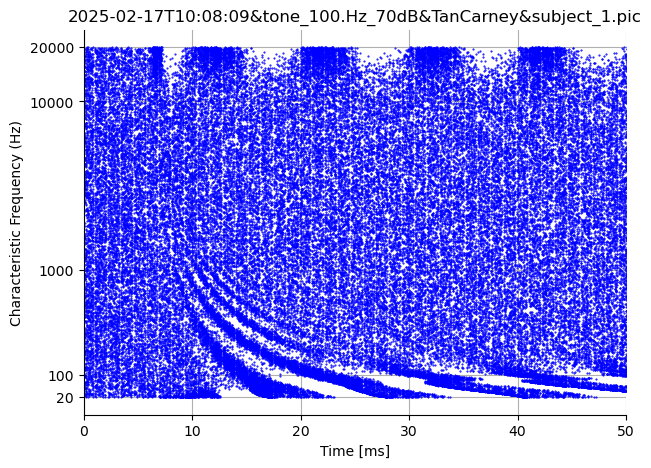

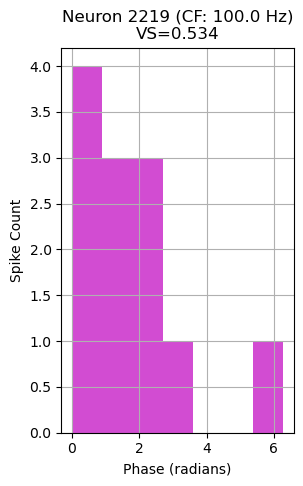

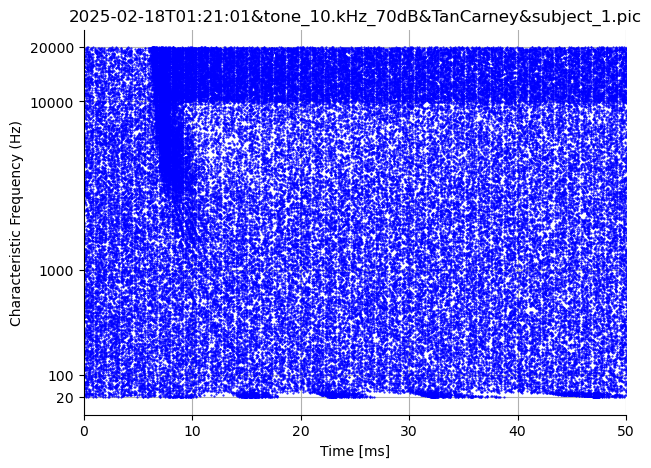

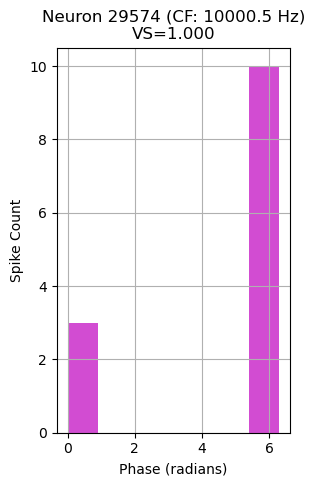

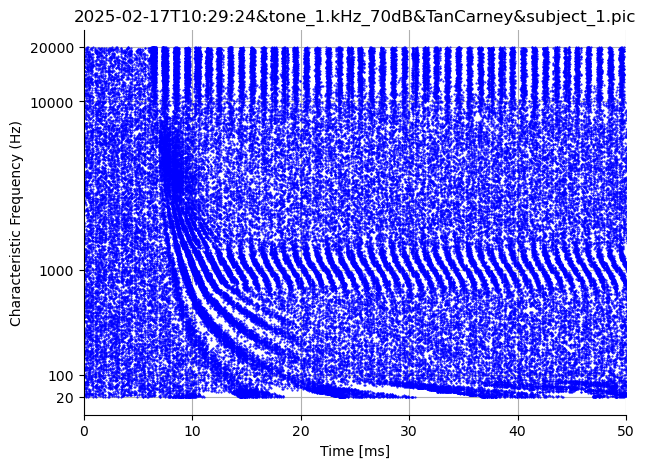

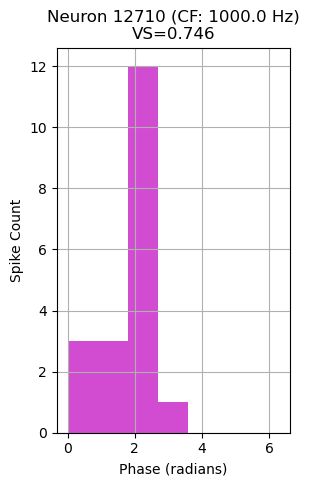

In [26]:
# Define the folder path
folder_path = "/home/ubuntu/polithesis/results/anf_rasterplots/TanCarney&subject_1_few/"

# Get a list of all .pic files in the folder
pic_files = [f for f in os.listdir(folder_path) if f.endswith(".pic")]

# Loop through each .pic file and process it
for pic_file in pic_files:
    result_path = os.path.join(folder_path, pic_file)
    
    # Load the data from the .pic file
    with open(result_path, "rb") as f:
        res = dill.load(f, ignore=True)
    
    # Generate the plot
    fig = draw_spikes_single_pop(data=res, angle=0, side='L', pop='ANF', 
                                 y_ax='cf_custom', xlim=50,
                                 title=f"{pic_file}")
    
    fig2, vs = calculate_vector_strength_from_result(res = res, angle = 0, side = 'L', pop = 'ANF', bandwidth = 0, n_bins = 7,figsize = (3,5), display = True) #cf_target = 100
    # Show the plot
    plt.show()

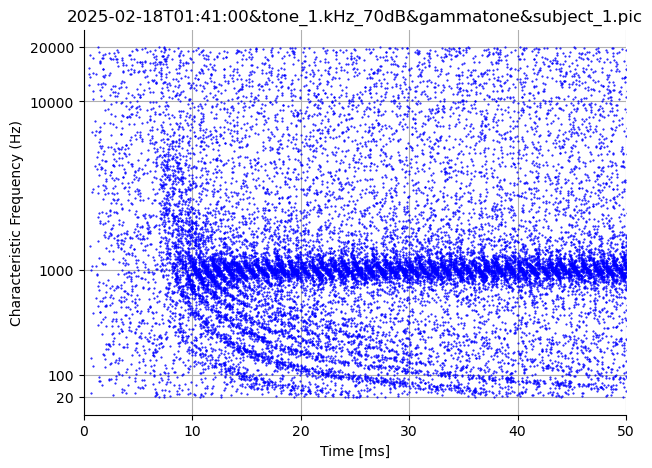

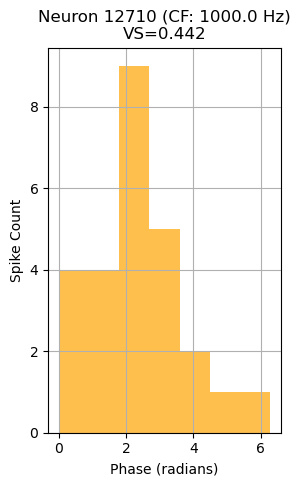

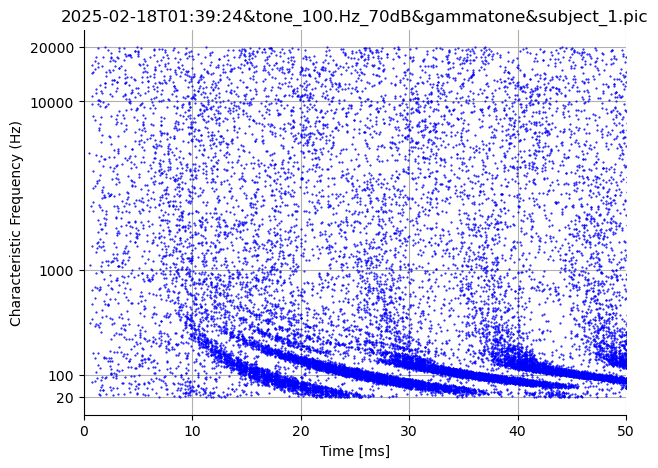

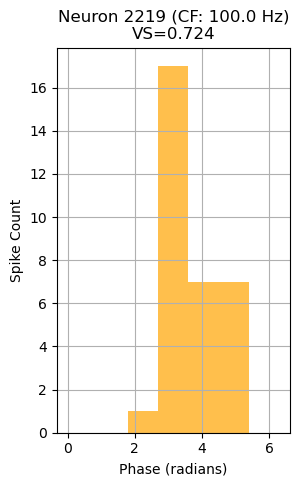

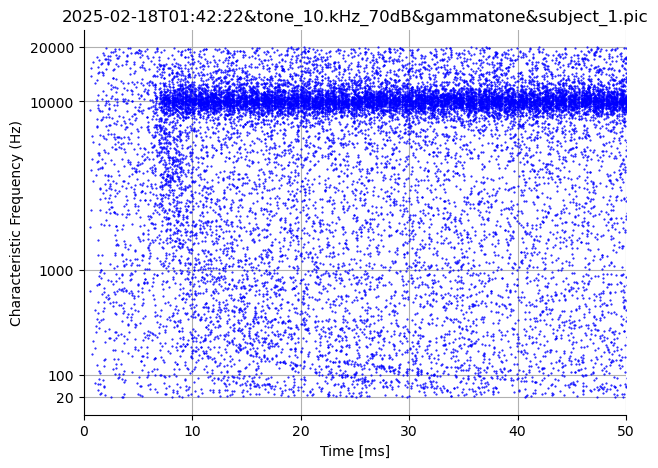

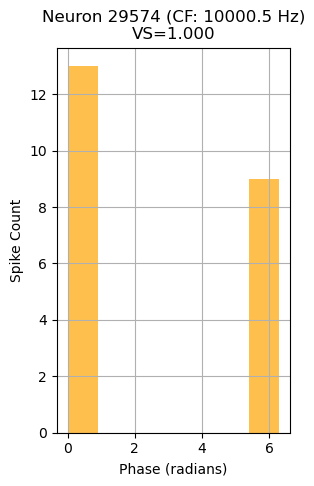

2025-02-18 02:27:52,233 [ERROR]  Frequency needs to be specified for non-Tone sounds


TypeError: '<' not supported between instances of 'Quantity' and 'NoneType'

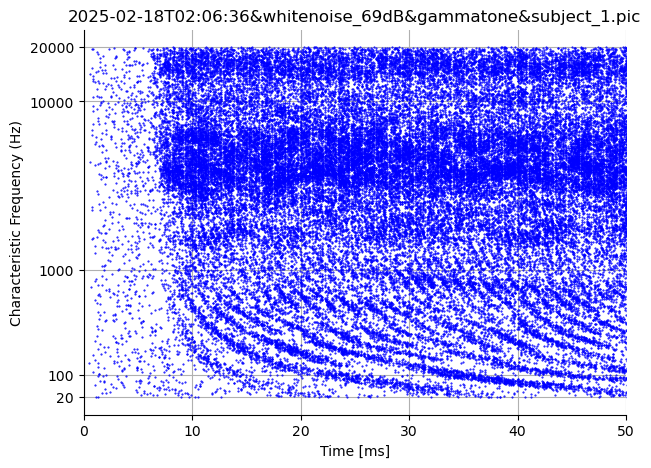

In [ ]:
# Define the folder path
folder_path = "/home/ubuntu/polithesis/results/anf_rasterplots/gammatone&subject_1/"

# Get a list of all .pic files in the folder
pic_files = [f for f in os.listdir(folder_path) if f.endswith(".pic")]

# Loop through each .pic file and process it
for pic_file in pic_files:
    result_path = os.path.join(folder_path, pic_file)
    
    # Load the data from the .pic file
    with open(result_path, "rb") as f:
        res = dill.load(f, ignore=True)
    
    # Generate the plot
    fig = draw_spikes_single_pop(data=res, angle=0, side='L', pop='ANF', 
                                 y_ax='cf_custom', xlim=50, 
                                 title=f"{pic_file}", color = 'b')
    
    fig2, vs = calculate_vector_strength_from_result(res = res, angle = 0, side = 'L', pop = 'ANF', bandwidth = 0, color = 'b', figsize = (3,5), n_bins = 7, display = True, ) #cf_target = 100
    # Show the plot
    plt.show()

In [14]:
result_path = '/home/ubuntu/polithesis/results/itd_ild_all/2025-01-27T11:34:49&tone_100.Hz_70dB&TanCarney&v0&headless.pic'
with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle2(
    res,
    "All Populations",
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)